# Simple Linear Regression, Minimal example

### Import the relevant libraries

In [13]:
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D #nice 3D graphs

### Generate random input data to train on

In [17]:
observations = 1000

xs=np.random.uniform(low=-10, high=10, size = (observations, 1))
zs=np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

In [19]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


### Plot the training data

#### The point is to see that there is a strong trend that our model should learn to reproduce.

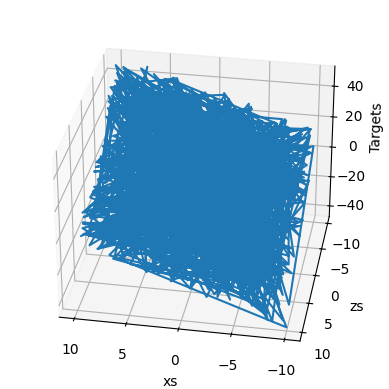

In [25]:
targets = targets.reshape(observations,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Initialize variables

In [28]:
init_range = 0.1 #our initial weights and biases will be picked randomly from the interval (-0.1,0.1)

weights = np.random.uniform(-init_range,init_range,size=(2,1)) # We have two variables, so there will be two weights and a single output (2,1)

biases = np.random.uniform(-init_range,init_range,size=1)# We have a 1 by 1 biases so it is a scaler. There are as many biases as outputs in ML.

print(weights)
print(biases)

[[ 0.09970453]
 [-0.02967393]]
[-0.01951623]


### Set a learning rate

In [32]:
learning_rate = 0.02 # Nothing special about this number, play around with various numbers to see what works best

### Train the Model


In [46]:
for i in range (100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas **2) / 2 / observations
    print(loss)
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)



0.39860689609152156
0.38982646696910755
0.3813932313394341
0.373293460565811
0.3655139688658056
0.3580420918458364
0.3508656658845471
0.3439730083314032
0.33735289848826006
0.330994559342963
0.3248876400252289
0.31902219895625084
0.31338868766460015
0.30797793524207395
0.30278113341418783
0.2977898222010027
0.2929958761449524
0.28839149108324647
0.2839691714433101
0.2797217180405926
0.2756422163588654
0.27172402529393963
0.2679607663424781
0.2643463132182973
0.26087478187926333
0.2575405209485381
0.25433810251458655
0.2512623132949708
0.2483081461495388
0.24547079192919966
0.2427456316470118
0.24012822895883887
0.23761432294133483
0.23519982115550003
0.23288079298451556
0.23065346323501149
0.22851420599135316
0.2264595387129393
0.22448611656490225
0.22259072697298207
0.22077028439371343
0.2190218252914045
0.21734250331373742
0.21572958465813258
0.2141804436213364
0.21269255832498463
0.21126350661018528
0.20989096209443603
0.20857269038445997
0.20730654543878965
0.2060904660741831
0.204

### Print weights and biases and see if we have worked correctly

In [48]:
print(weights, biases)

[[ 2.00034165]
 [-3.00446412]] [4.90402603]


### Plot last outputs vs targets

Since they are the last ones at the end of the taraining, they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer target and output values are.

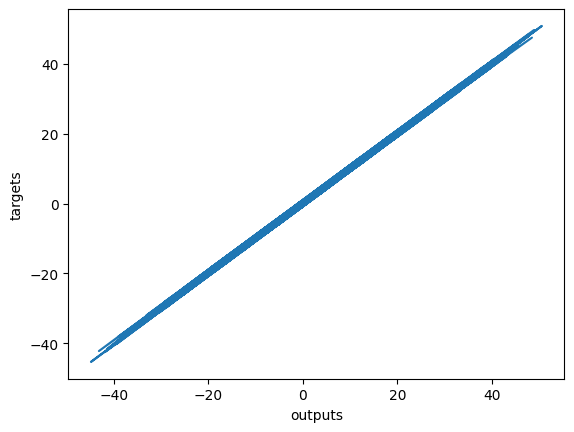

In [50]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show() # The closer this line is to a 45 degree line, the closer the outputs are to the targets.